In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
%matplotlib inline

In [40]:
url = 'https://raw.githubusercontent.com/ferdinjoe/DSA206/main/kanchanaburi_pm25.csv'
df = pd.read_csv(url)
df

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0
...,...,...,...,...,...,...,...
23803,2019,2,7,5,35.0,45,0
23804,2019,2,7,6,35.0,45,0
23805,2019,2,7,7,42.0,56,0
23806,2019,2,7,8,47.0,64,0


In [41]:
df.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,65.2,1,0
1,2016,3,3,9,65.2,1,0
2,2016,3,3,10,64.9,1,0
3,2016,3,3,11,64.9,1,0
4,2016,3,3,12,38.4,1,0


In [42]:
df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,65.2,1,0,2016-03-03 15:00:00
1,2016,3,3,9,65.2,1,0,2016-03-03 16:00:00
2,2016,3,3,10,64.9,1,0,2016-03-03 17:00:00
3,2016,3,3,11,64.9,1,0,2016-03-03 18:00:00
4,2016,3,3,12,38.4,1,0,2016-03-03 19:00:00


In [43]:
df.index = df['datetime']
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,8,65.2,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,65.2,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,64.9,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,64.9,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,38.4,1,0,2016-03-03 19:00:00


In [44]:
df.Hour = df.index.hour
df.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,65.2,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,65.2,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,64.9,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,64.9,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,38.4,1,0,2016-03-03 19:00:00


In [45]:
df.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
df.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,65.2
2016-03-03 16:00:00,2016,3,3,16,65.2
2016-03-03 17:00:00,2016,3,3,17,64.9
2016-03-03 18:00:00,2016,3,3,18,64.9
2016-03-03 19:00:00,2016,3,3,19,38.4


In [46]:
df.corr()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230838,-0.040039,0.004402,0.246336
Month,-0.230838,1.000000,0.006897,-0.001513,-0.326465
Day,-0.040039,0.006897,1.000000,0.000427,-0.005119
Hour,0.004402,-0.001513,0.000427,1.000000,-0.074387
PM2.5,0.246336,-0.326465,-0.005119,-0.074387,1.000000


In [47]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [48]:
df[['Year', 'Month', 'Day', 'Hour', 'PM2.5']].corr()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230838,-0.040039,0.004402,0.246336
Month,-0.230838,1.000000,0.006897,-0.001513,-0.326465
Day,-0.040039,0.006897,1.000000,0.000427,-0.005119
Hour,0.004402,-0.001513,0.000427,1.000000,-0.074387
PM2.5,0.246336,-0.326465,-0.005119,-0.074387,1.000000


In [49]:
dcorr=df[['Year', 'Month', 'Day', 'Hour', 'PM2.5']].corr()

In [51]:
dcorr.style.background_gradient()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230838,-0.040039,0.004402,0.246336
Month,-0.230838,1.000000,0.006897,-0.001513,-0.326465
Day,-0.040039,0.006897,1.000000,0.000427,-0.005119
Hour,0.004402,-0.001513,0.000427,1.000000,-0.074387
PM2.5,0.246336,-0.326465,-0.005119,-0.074387,1.000000


In [52]:
url = 'https://raw.githubusercontent.com/ferdinjoe/DSA206/main/rayongmaptaphut_pm25.csv'
df2 = pd.read_csv(url)
df2

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0
...,...,...,...,...,...,...,...
23807,2019,2,7,5,18.0,40,0
23808,2019,2,7,6,27.0,42,0
23809,2019,2,7,7,20.0,37,0
23810,2019,2,7,8,29.0,34,0


In [53]:
df2.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df2.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,40.6,1,0
1,2016,3,3,9,40.6,1,0
2,2016,3,3,10,40.6,1,0
3,2016,3,3,11,40.6,1,0
4,2016,3,3,12,38.7,1,0


In [55]:
df2['datetime'] = pd.to_datetime(df2[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df2.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,40.6,1,0,2016-03-03 15:00:00
1,2016,3,3,9,40.6,1,0,2016-03-03 16:00:00
2,2016,3,3,10,40.6,1,0,2016-03-03 17:00:00
3,2016,3,3,11,40.6,1,0,2016-03-03 18:00:00
4,2016,3,3,12,38.7,1,0,2016-03-03 19:00:00


In [56]:
df2.index = df2['datetime']
df2.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,8,40.6,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,40.6,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,40.6,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,40.6,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,38.7,1,0,2016-03-03 19:00:00


In [57]:
df2.Hour = df2.index.hour
df2.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,40.6,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,40.6,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,40.6,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,40.6,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,38.7,1,0,2016-03-03 19:00:00


In [58]:
df2.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
df2.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,40.6
2016-03-03 16:00:00,2016,3,3,16,40.6
2016-03-03 17:00:00,2016,3,3,17,40.6
2016-03-03 18:00:00,2016,3,3,18,40.6
2016-03-03 19:00:00,2016,3,3,19,38.7


In [59]:
df2.corr()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230730,-0.039852,0.004067,0.049717
Month,-0.230730,1.000000,0.006848,-0.001470,-0.221688
Day,-0.039852,0.006848,1.000000,0.000205,-0.000137
Hour,0.004067,-0.001470,0.000205,1.000000,-0.028717
PM2.5,0.049717,-0.221688,-0.000137,-0.028717,1.000000


In [60]:
df2.columns

Index(['Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [61]:
df2[['Year', 'Month', 'Day', 'Hour', 'PM2.5']].corr()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230730,-0.039852,0.004067,0.049717
Month,-0.230730,1.000000,0.006848,-0.001470,-0.221688
Day,-0.039852,0.006848,1.000000,0.000205,-0.000137
Hour,0.004067,-0.001470,0.000205,1.000000,-0.028717
PM2.5,0.049717,-0.221688,-0.000137,-0.028717,1.000000


In [64]:
dcorr1=df2[['Year', 'Month', 'Day', 'Hour', 'PM2.5']].corr()

In [65]:
dcorr1.style.background_gradient()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230730,-0.039852,0.004067,0.049717
Month,-0.230730,1.000000,0.006848,-0.001470,-0.221688
Day,-0.039852,0.006848,1.000000,0.000205,-0.000137
Hour,0.004067,-0.001470,0.000205,1.000000,-0.028717
PM2.5,0.049717,-0.221688,-0.000137,-0.028717,1.000000


In [66]:
url = 'https://raw.githubusercontent.com/ferdinjoe/DSA206/main/narathiwat_pm25.csv'
df3 = pd.read_csv(url)
df3

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0
...,...,...,...,...,...,...,...
23810,2019,2,7,5,15.0,21,0
23811,2019,2,7,6,12.0,24,0
23812,2019,2,7,7,12.0,26,0
23813,2019,2,7,8,20.0,29,0


In [67]:
df3.rename(columns={'UTC Hour':'Hour'}, inplace=True)
df3.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1,0
1,2016,3,3,9,62.9,1,0
2,2016,3,3,10,55.5,1,0
3,2016,3,3,11,55.5,1,0
4,2016,3,3,12,47.9,1,0


In [68]:
df3['datetime'] = pd.to_datetime(df3[['Year', 'Month', 'Day', 'Hour']]) + pd.Timedelta(hours=7) # UTC to Bangkok time
df3.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
0,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
1,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
3,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
4,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [69]:
df3.index = df3['datetime']
df3.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,8,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,9,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,10,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,11,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,12,47.9,1,0,2016-03-03 19:00:00


In [70]:
df3.Hour = df3.index.hour
df3.head()

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,datetime
datetime,,,,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9,1,0,2016-03-03 15:00:00
2016-03-03 16:00:00,2016,3,3,16,62.9,1,0,2016-03-03 16:00:00
2016-03-03 17:00:00,2016,3,3,17,55.5,1,0,2016-03-03 17:00:00
2016-03-03 18:00:00,2016,3,3,18,55.5,1,0,2016-03-03 18:00:00
2016-03-03 19:00:00,2016,3,3,19,47.9,1,0,2016-03-03 19:00:00


In [71]:
df3.drop(columns=['PM10_mask','Retrospective','datetime'],inplace=True)
df3.head()

,Year,Month,Day,Hour,PM2.5
datetime,,,,,
2016-03-03 15:00:00,2016,3,3,15,62.9
2016-03-03 16:00:00,2016,3,3,16,62.9
2016-03-03 17:00:00,2016,3,3,17,55.5
2016-03-03 18:00:00,2016,3,3,18,55.5
2016-03-03 19:00:00,2016,3,3,19,47.9


In [72]:
df3.corr()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230780,-0.039817,0.004124,-0.028873
Month,-0.230780,1.000000,0.006778,-0.001514,-0.063977
Day,-0.039817,0.006778,1.000000,0.000189,0.001592
Hour,0.004124,-0.001514,0.000189,1.000000,-0.035649
PM2.5,-0.028873,-0.063977,0.001592,-0.035649,1.000000


In [73]:
df3.columns

Index(['Year', 'Month', 'Day', 'Hour', 'PM2.5'], dtype='object')

In [74]:
df3[['Year', 'Month', 'Day', 'Hour', 'PM2.5']].corr()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230780,-0.039817,0.004124,-0.028873
Month,-0.230780,1.000000,0.006778,-0.001514,-0.063977
Day,-0.039817,0.006778,1.000000,0.000189,0.001592
Hour,0.004124,-0.001514,0.000189,1.000000,-0.035649
PM2.5,-0.028873,-0.063977,0.001592,-0.035649,1.000000


In [75]:
dcorr2=df3[['Year', 'Month', 'Day', 'Hour', 'PM2.5']].corr()

In [77]:
dcorr2.style.background_gradient()

,Year,Month,Day,Hour,PM2.5
Year,1.000000,-0.230780,-0.039817,0.004124,-0.028873
Month,-0.230780,1.000000,0.006778,-0.001514,-0.063977
Day,-0.039817,0.006778,1.000000,0.000189,0.001592
Hour,0.004124,-0.001514,0.000189,1.000000,-0.035649
PM2.5,-0.028873,-0.063977,0.001592,-0.035649,1.000000


In [78]:
pv = pd.pivot_table(df, index=df.index.dayofyear, columns=df.index.year,values='PM2.5', aggfunc='mean')
pv

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.166667,23.969565,24.729167
2,NaN,19.500000,31.250000,34.583333
3,NaN,22.962500,35.725000,38.041667
4,NaN,27.608333,41.716667,42.541667
5,NaN,29.575000,46.625000,46.083333
...,...,...,...,...
362,27.325000,12.754545,NaN,NaN
363,23.878261,13.358333,NaN,NaN
364,34.037500,19.945833,NaN,NaN


<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)'}, xlabel='datetime'>

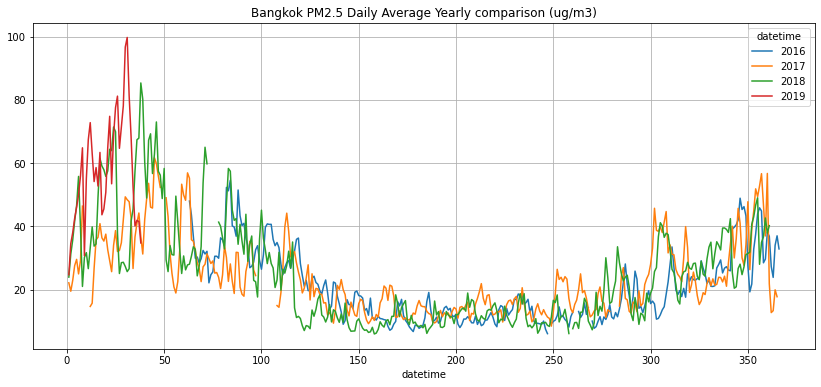

In [79]:
pv.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [82]:
pv2 = pd.pivot_table(df2, index=df2.index.dayofyear, columns=df2.index.year,values='PM2.5', aggfunc='mean')
pv2

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,25.054167,17.834783,12.058333
2,NaN,22.166667,19.883333,18.583333
3,NaN,22.712500,29.370833,14.458333
4,NaN,23.345833,35.950000,27.500000
5,NaN,29.220833,48.679167,36.041667
...,...,...,...,...
362,29.245833,27.568182,NaN,NaN
363,21.208696,21.100000,NaN,NaN
364,27.425000,22.933333,NaN,NaN


<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)'}, xlabel='datetime'>

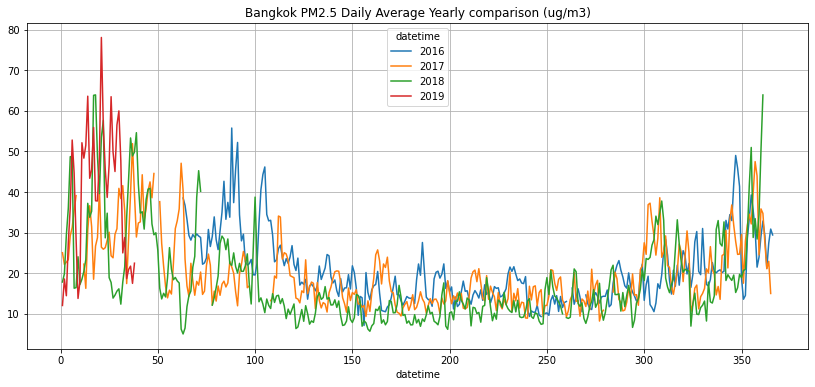

In [84]:
pv2.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [85]:
pv3 = pd.pivot_table(df3, index=df3.index.dayofyear, columns=df3.index.year,values='PM2.5', aggfunc='mean')
pv3

datetime,2016,2017,2018,2019
datetime,,,,
1,NaN,22.187500,21.995652,21.691667
2,NaN,20.433333,26.062500,18.041667
3,NaN,20.837500,32.045833,13.708333
4,NaN,25.137500,35.591667,5.500000
5,NaN,26.462500,41.770833,13.166667
...,...,...,...,...
362,27.770833,21.618182,NaN,NaN
363,33.321739,18.612500,NaN,NaN
364,32.800000,18.825000,NaN,NaN


<AxesSubplot:title={'center':'Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)'}, xlabel='datetime'>

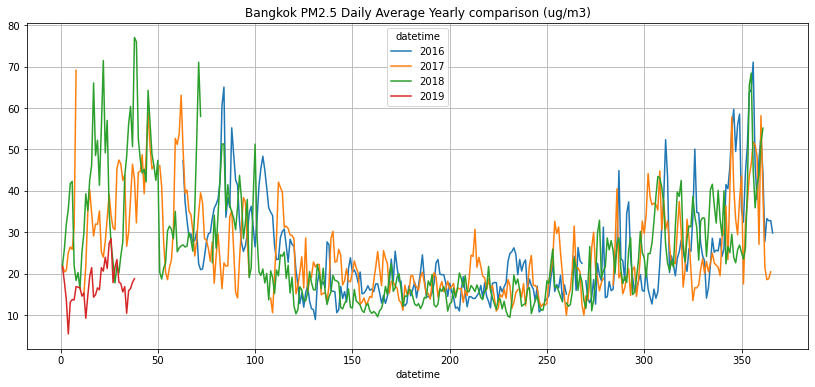

In [86]:
pv3.plot(title="Bangkok PM2.5 Daily Average Yearly comparison (ug/m3)",figsize=(14,6), grid=True)

In [96]:
arr = []
for i in df1['PM2.5']:
    if i<50:
        arr.append('Normal')
    elif i<100:
        arr.append('High')
    else:
        arr.append('Very high')
df1['size'] = arr
df1.head()


,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective,size
0,2016,3,3,8,65.2,1,0,High
1,2016,3,3,9,65.2,1,0,High
2,2016,3,3,10,64.9,1,0,High
3,2016,3,3,11,64.9,1,0,High
4,2016,3,3,12,38.4,1,0,Normal


In [98]:
pie_size2 = df1.groupby(by=df1['size']).sum()
pie_size2

,Year,Month,Day,Hour,PM2.5,PM10_mask,Retrospective
size,,,,,,,
High,3650351,6739,27280,22205,115766.3,41432,0
Normal,44207848,151402,345359,250440,453664.6,21038,0
Very high,165543,105,2030,616,9042.6,8219,0


AttributeError: 'AxesSubplot' object has no attribute 'df1'

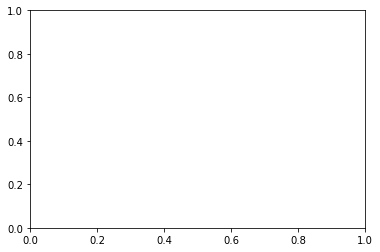

In [100]:
explode = (0.1, 0.3, 0.5)

fig, ax = plt.subplots()
ax.pie(pie,
       explode=explode,
       labels=l,
       autopct='%1.2f%%',
       shadow=True,
       startangle=180)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Level of PM2.5')

plt.show()